In [41]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Rock

In [42]:
audio_path = './data/genres/rock/rock.00000.au'
y, sr = librosa.load(audio_path)

In [43]:
print(y)
print(len(y))
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f'%(len(y)/sr)) # 음악의 길이(초) = 음파의 길이(y)/Sampling rate(sr)

[-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ]
661794
Sampling rate (Hz): 22050
Audio length (seconds): 30.01


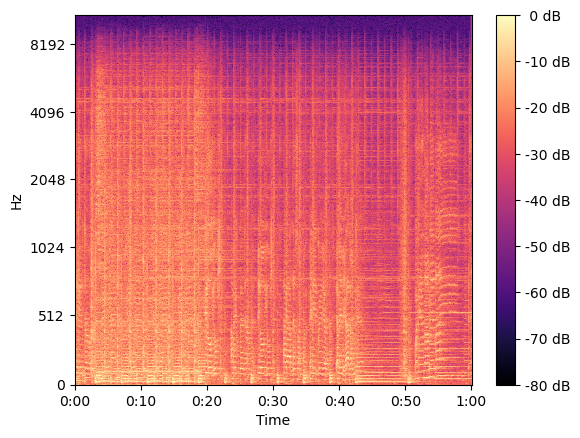

In [44]:
# STFT(Short Time Fourier Transform)
stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

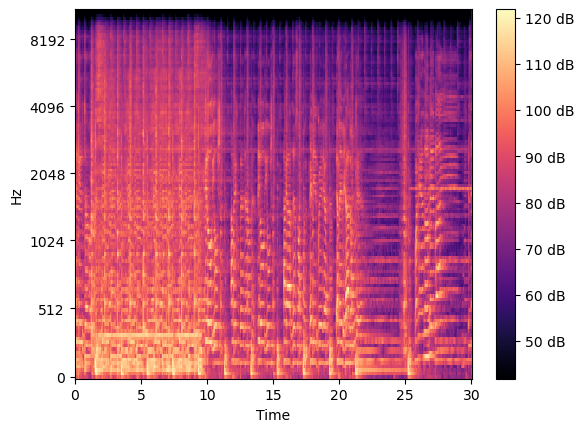

In [45]:
# Mel Spectrogram 생성
D = np.abs(librosa.stft(y, n_fft=4096, win_length=4096, hop_length=512))
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=128, hop_length=512, win_length=4096)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.00002), sr=sr, hop_length=512, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

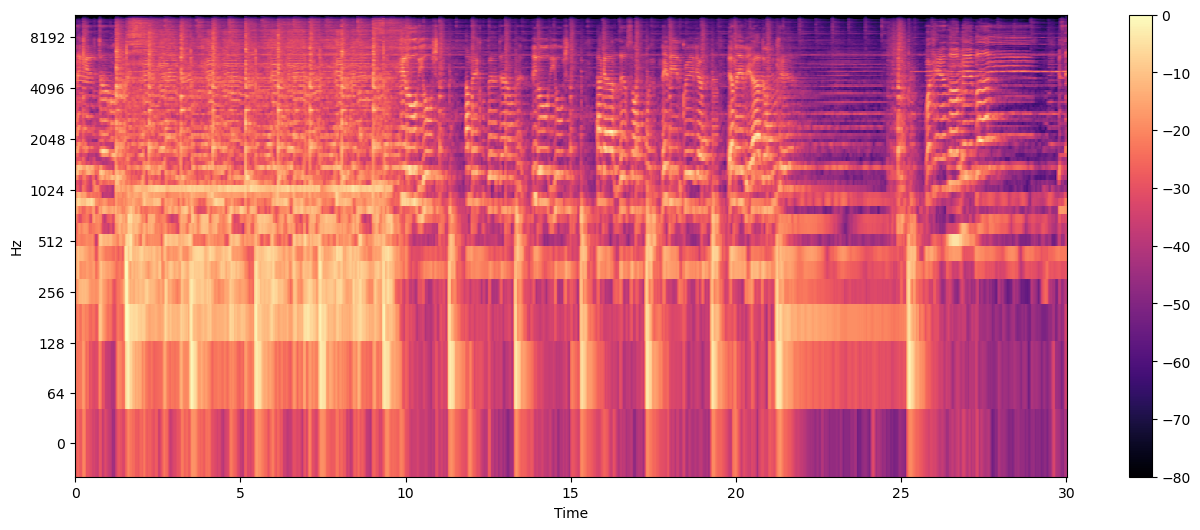

In [46]:
# MFCC 생성
D = np.abs(librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=512))
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(D), sr=sr, n_mfcc=40)

S_DB = librosa.amplitude_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

In [47]:
# 오디오 특성 추출
tempo = librosa.beat.beat_track(y=y,sr=sr)
print(tempo)

(123.046875, array([  12,   33,   55,   77,   98,  119,  139,  161,  181,  203,  224,
        246,  266,  287,  308,  329,  349,  370,  390,  412,  433,  455,
        477,  498,  519,  541,  562,  583,  605,  626,  647,  669,  690,
        712,  732,  754,  776,  798,  818,  839,  861,  882,  904,  925,
        946,  968,  989, 1010, 1032, 1053, 1074, 1093, 1112]))


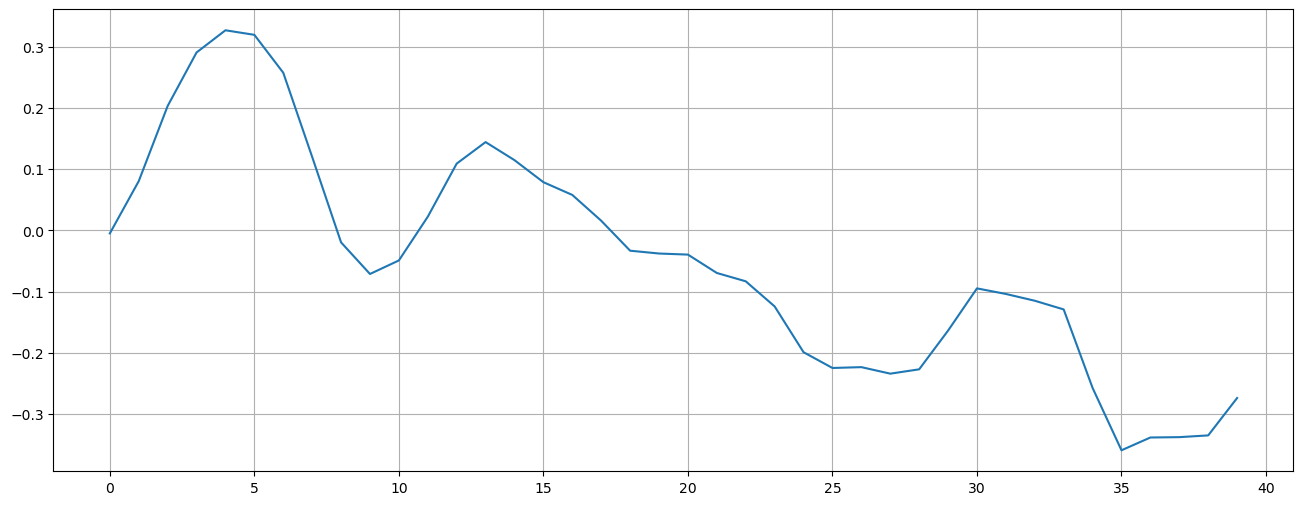

In [48]:
n0=9000
n1=9040

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

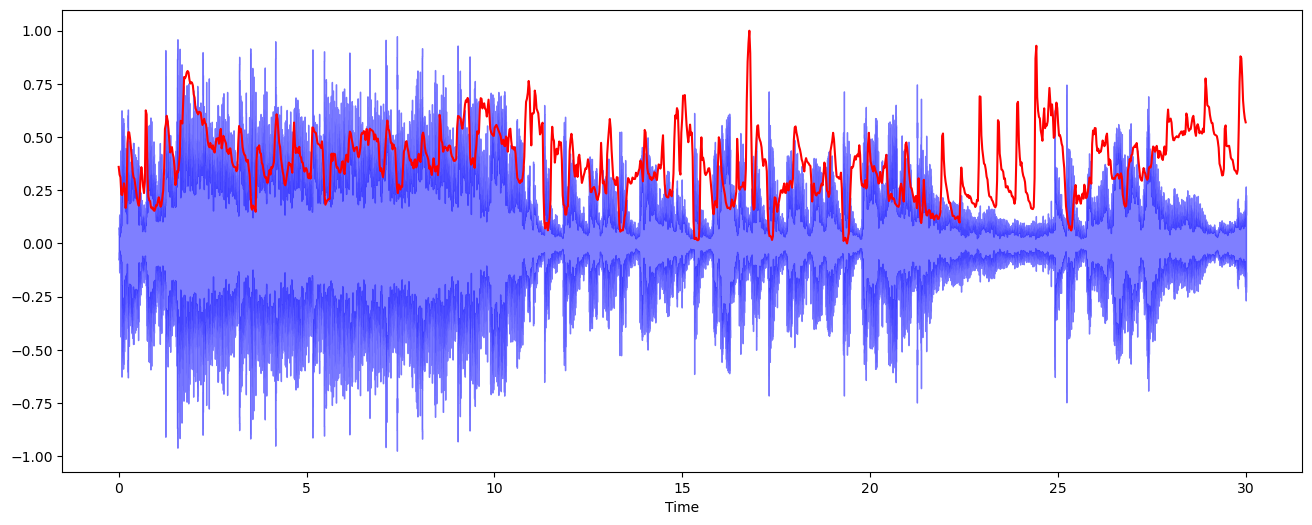

In [49]:
# Spectral Centroid (소리 무게중심)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

frames = range(len(spectral_centroids))

t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(16,6))
librosa.display.waveshow(y=y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

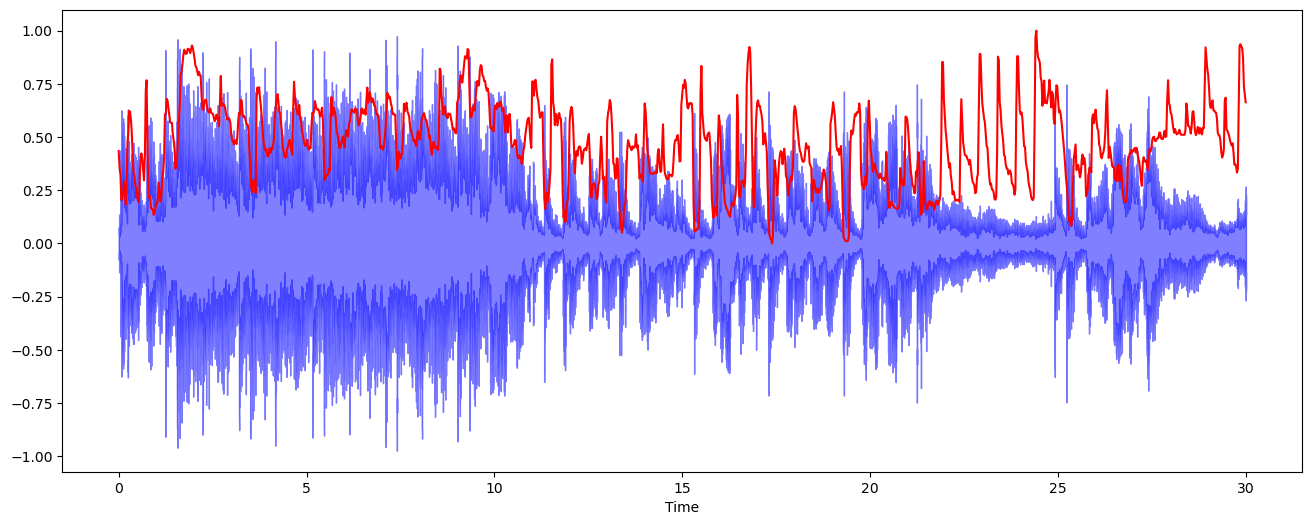

In [50]:
# 신호모양 측정
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(y=y,sr=sr,alpha=0.5,color='b')
plt.plot(t, normalize(spectral_rolloff),color='r')
plt.show()

mean: 0.53
var: 0.03


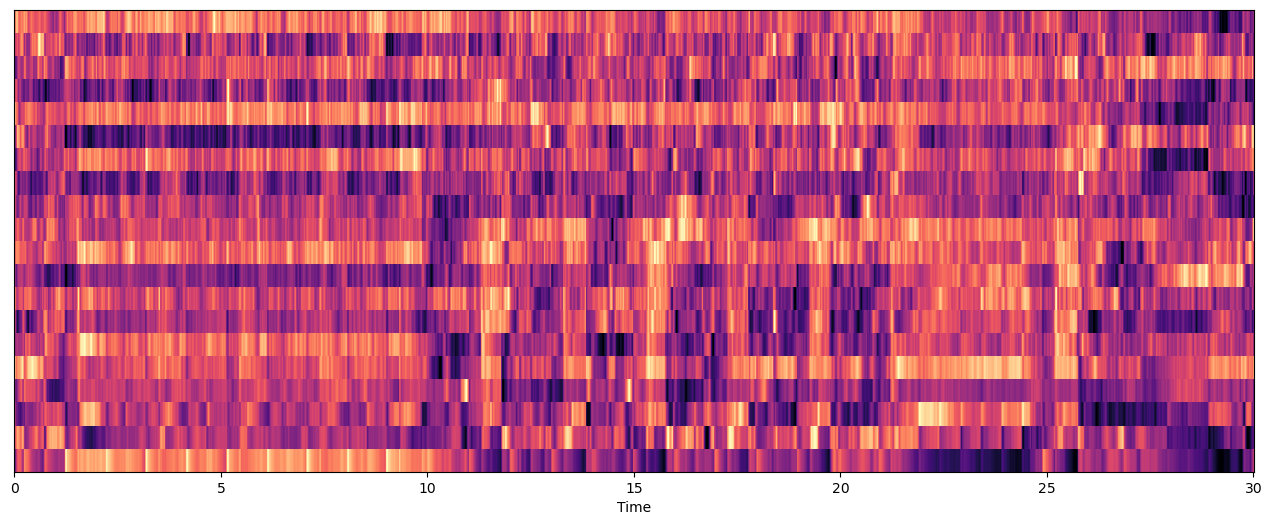

In [51]:
# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs = normalize(mfccs,axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.show()

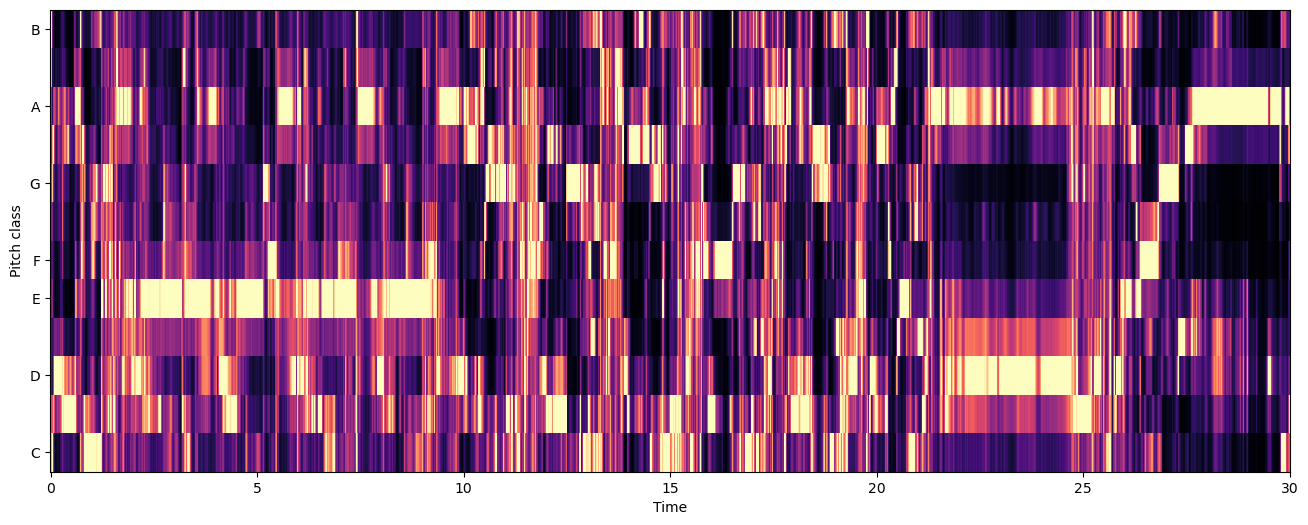

In [52]:
# 크로마 특징 추출
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
plt.show()